# Support Vector Machine

If you have any question regrading this particular assignment feel free to email gibran.muhammad@ui.ac.id

# Table Of Content

* [Kernel](#Kernel)
    * [Linear Kernel](#Linear-Kernel) (score:1)
    * [Polynomial Kernel](#Polynomial-Kernel) (score:1)
    * [RBF Kernel](#RBF-Kernel) (score:1)
* [Support Vector Machine](#Support-Vector-Machine) (score:2)
* [Exercise](#Exercise) (score:1)



In [1]:
#put your npm as string below
NPM = "1606882540"

#if someone that also take an ML class this year help you doing this assingment,put his/her NPM as list of string below
COLLABORATORS = []

#if youre using external sources please put its link as list of string below
SOURCES = []

In [2]:
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def is_similar(X, Y):
    if isinstance(X, list) and isinstance(Y, list):
        if len(X) == len(Y):
            return all([is_similar(x,Y[i]) for i,x in enumerate(X)])
        else:
            return False
    return abs(X-Y) <= 1e-7

## Kernel

### Linear Kernel
#### score: 1 point
without using any external library, implement linear kernel

$$ K(x, y) = x^Ty $$

x, y represented as list with the same length

In [4]:
def linear_kernel(x,y):
    # YOUR CODE HERE
    k = 0
    for i in range(len(x)):
        k += x[i]*y[i]
    return k
#     raise NotImplementedError()

In [5]:
x = [1,2,3]
y = [3,4,5]
assert is_similar(linear_kernel(x,y), 26)

x = [0,-1,2,4]
y = [0,-1,2,4]
assert is_similar(linear_kernel(x,y), 21)


### Polynomial Kernel
#### score: 1 point
without using any external library, implement polynomial kernel with degree d

$$ K(x, y, d) = (c + x^Ty)^d $$

with c = 1 <br>
x,y represented as list with the same length

In [6]:
def polynomial_kernel(x,y,d=3):
    # YOUR CODE HERE
    k = 0
    for i in range(len(x)):
        k += x[i]*y[i]
    k += 1
    k = k**d
    return k
#     raise NotImplementedError()

In [7]:
x = [1,2,3]
y = [3,4,5]
d = 2
assert is_similar(polynomial_kernel(x,y,d), 729)

x = [0,-1,2,4]
y = [0,-1,2,4]
d = 3
assert is_similar(polynomial_kernel(x,y,d), 10648)


### RBF Kernel
#### score: 1 point
without using any external library except <b>numpy.linalg.norm</b>, implement RBF or Gaussian kernel


$$ K(x, y) = exp(-||x-y||^2/2\sigma^2) $$


x,y represented as list with the same length

In [8]:
from numpy.linalg import norm

In [9]:
def rbf_kernel(x,y,sigma):
    e = 2.718281828459045
    # YOUR CODE HERE
    sub = []
    for i in range(len(x)):
        sub.append(abs(x[i]-y[i]))
    norm_res = norm(sub)
    arg = -(norm_res**2)/(2*(sigma**2))
    res = e**arg
    return res
#     raise NotImplementedError()

In [10]:
x = [1,2,3]
y = [3,4,5]
sigma = 2
assert is_similar(rbf_kernel(x,y,sigma), 0.2231301601484299)

x = [0,2,4,1]
y = [0,-1,2,4]
sigma = 5
assert is_similar(rbf_kernel(x,y,sigma), 0.6440364210831414)


## Support Vector Machine

#### total score: 2 point
##### 1 point for fit (X,y)
##### 1 point for predict (X)

implement Support Vector Machine for binary classification problem **you are only allowed to use numpy and numpy.linalg**

use function fit to train the model

and function predict to predict the trained model

X is matrix of data (column as features, row as datapoint)

y is vector of label (-1 or 1) coresponding to X

a is lagrange multipliers ($\lambda$)

b is intercept

sv is support vector

svt is label of the support vector 



In [11]:
import cvxopt
import numpy as np

In [12]:
class SVM:
    def __init__(self, kernel=linear_kernel, C=None, degree=3, sigma=5):
        self.a = None
        self.sv = None
        self.svt = None
        self.b = None
        self.C = C
        self.kernel = kernel
        self.degree = degree
        self.sigma = sigma
        if(self.C is not None):
            self.C = float(self.C)
            
    def _qpSolver(self, X, y):
        n, features = X.shape
#         print(n)
        K = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                 K[i,j] = self.kernel(X[i], X[j])
                
        P = cvxopt.matrix(np.outer(y,y) * K)
#         print("P : ",P)
        q = cvxopt.matrix(np.ones(n) * -1)
#         print("q : ",q)
        A = cvxopt.matrix(y, (1,n), 'd')
#         print("A : ",A)
        b = cvxopt.matrix(0.0)
#         print("b : ",b)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n) * -1))
            h = cvxopt.matrix(np.zeros(n))
        else:
            G = cvxopt.matrix(np.vstack((np.diag(np.ones(n) * -1), np.identity(n))))
            h = cvxopt.matrix(np.hstack((np.zeros(n), np.ones(n) * self.C)))
        
        cvxopt.solvers.options['show_progress'] = False
        res = cvxopt.solvers.qp(P, q, G, h, A, b)
        a = np.ravel(res['x'])
        return a
    
    # YOUR CODE HERE
    
    def fit(self, X, y):
#         # YOUR CODE HERE
        self.a = self._qpSolver(X,y)
        self.a_sv = self.a[self.a > 1e-7]
        self.sv = X[self.a > 1e-7]
        self.svt = y[self.a > 1e-7]
        ns = len(self.sv)
        b = 0
        for i in range(len(self.svt)):
            jumlahan = 0
            for j in range(len(self.svt)):
                jumlahan += self.a_sv[j]*self.svt[j]*self.kernel(self.sv[j],self.sv[i])
            b += self.svt[i]-jumlahan
        self.b = b/ns
        return 0
        #raise NotImplementedError()
        
    def predict(self, X):
        y_predict = None
        # YOUR CODE HERE
        y_predict = np.zeros(len(X))
        for i in range(len(X)):
            jumlahan = 0
            for j in range(len(self.sv)):
                jumlahan += np.dot(self.a_sv[j]*self.svt[j],self.kernel(self.sv[j],X[i]))
            y_predict[i] = jumlahan
#         raise NotImplementedError()
        print(y_predict)
        return np.sign(y_predict + self.b), y_predict + self.b

In [13]:
def test_svm():
    X = np.zeros((100,2))
    np.random.seed(64)
    X[0:50,0] = np.random.uniform(-3,1,50)
    np.random.seed(36)
    X[0:50,1] = np.random.uniform(-3,1,50)

    np.random.seed(64)
    X[50:,0] = np.random.uniform(2,4,50)
    np.random.seed(36)
    X[50:,1] = np.random.uniform(-2,6,50)
    y = np.array([-1 if i < 50 else 1 for i in range(100)])

    svm = SVM(kernel=polynomial_kernel)
    svm.fit(X,y)
    return X,y,svm

X,y, svm = test_svm()

g = np.array([[ 0.95732021, -1.0710335 ],
       [ 0.82783717,  0.2080372 ],
       [ 2.00389699, -0.31674417],
       [ 2.07133994,  3.36711104],
       [ 2.03597597,  0.73548602]])
t = np.array([-1, -1,  1,  1,  1])

X_test = np.array([[0.53223423, 4.2422343242]])
y_test,_ = svm.predict(X_test)

np.testing.assert_array_almost_equal(svm.sv, g)
np.testing.assert_array_almost_equal(svm.svt, t)
np.testing.assert_array_almost_equal(y_test, np.array([-1.]))


[1.24822802]


In [14]:
# PLAYGROUND
# you can do anything here as long as not adding any new import or breaking stuff

# X = np.zeros((100,2))
# np.random.seed(64)
# X[0:50,0] = np.random.uniform(-3,1,50)
# np.random.seed(36)
# X[0:50,1] = np.random.uniform(-3,1,50)

# np.random.seed(64)
# X[50:,0] = np.random.uniform(2,4,50)
# np.random.seed(36)
# X[50:,1] = np.random.uniform(-2,6,50)
# y = np.array([-1 if i < 50 else 1 for i in range(100)])

# svm = SVM(kernel=linear_kernel)
# print("X : ",X)
# print("y : ",y)
# alfa = svm._qpSolver(X, y)
# print("Alfa : ",alfa)
# print("Alfa shape : ",alfa.shape)

np.dot(4,np.array([1,2,3]))

# X = np.zeros((100,2))
# np.random.seed(64)
# X[0:50,0] = np.random.uniform(-3,1,50)
# np.random.seed(36)
# X[0:50,1] = np.random.uniform(-3,1,50)

# np.random.seed(64)
# X[50:,0] = np.random.uniform(2,4,50)
# np.random.seed(36)
# X[50:,1] = np.random.uniform(-2,6,50)
# y = np.array([-1 if i < 50 else 1 for i in range(100)])

# svm = SVM(kernel=polynomial_kernel)
# svm.fit(X,y)
    
# def plot_contour(X1_train, X2_train, clf):
#     plt.plot(X1_train[:,0], X1_train[:,1], "ro")
#     plt.plot(X2_train[:,0], X2_train[:,1], "bo")
#     plt.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

#     X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
#     X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
#     _, project = clf.predict(X)
#     Z = project.reshape(X1.shape)
#     plt.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
#     plt.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
#     plt.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

#     plt.axis("tight")
#     plt.show()
    
# plot_contour(X[y==1], X[y==-1], svm)

array([ 4,  8, 12])

### Exercise

given X_train and y_train, predict the label of X_test using Support Vector Machine

you are only allowed to use <b>numpy and numpy.linalg</b>

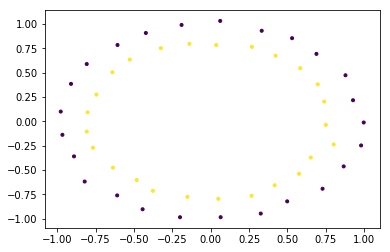

In [15]:
X_train = np.array([[ 0.32625355, -0.94726409],
       [-0.74441863,  0.27383975],
       [-0.13848114,  0.79547269],
       [ 0.9801023 , -0.24806749],
       [ 0.0621153 ,  1.03016724],
       [-0.97700346,  0.09963382],
       [-0.42244125,  0.90644976],
       [ 0.49859124, -0.82198025],
       [-0.19977433, -0.98509693],
       [-0.82097825, -0.61862732],
       [ 0.58365089,  0.54473471],
       [ 0.33246961,  0.92908773],
       [ 0.92758306,  0.2157438 ],
       [-0.32443099,  0.75049458],
       [-0.64006343,  0.50283855],
       [-0.37639392, -0.71349069],
       [ 0.41695202, -0.65669386],
       [ 0.68918272,  0.69169911],
       [-0.48224241, -0.60309897],
       [ 0.03625237,  0.78272488],
       [ 0.42309888,  0.67325122],
       [-0.80219813,  0.09187327],
       [ 0.74988172, -0.03716344],
       [-0.60924045, -0.761042  ],
       [-0.8077536 ,  0.58768096],
       [-0.18963537,  0.98880677],
       [ 0.65234292, -0.37208701],
       [ 0.69782225,  0.37878824],
       [ 0.04994162, -0.79597903],
       [-0.96606392, -0.13882518],
       [ 0.99724674, -0.01243279],
       [ 0.06492594, -0.98459514],
       [ 0.5305424 ,  0.85280978],
       [ 0.2681683 ,  0.76388573],
       [-0.52677094,  0.63364358],
       [ 0.72899717, -0.69239112],
       [ 0.57561069, -0.53852852],
       [-0.91005325,  0.3841486 ],
       [ 0.80153489, -0.23796694],
       [-0.6363921 , -0.47568971],
       [-0.60705324,  0.78305409],
       [-0.89052437, -0.36038825],
       [ 0.73986824,  0.20231909],
       [-0.15139136, -0.77562688],
       [-0.80735838, -0.10575167],
       [ 0.26652474, -0.76521636],
       [-0.44353959, -0.90317309],
       [ 0.86669567, -0.4633295 ],
       [-0.76635263, -0.27189397],
       [ 0.87843983,  0.47218692]])

y_train = np.array([-1, 1, 1, -1, -1, -1, -1, -1, -1, -1, 1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, 1,
       1, -1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1,
       1, 1, -1, -1, 1, -1])

X_test = np.array([[0,0],
                   [-1,-1],
                   [0.24342424,-0.2312321313],
                   [0.1234234124,-1],
                   [1.23412341242,-0.23421342],
                   [0.54645654456,-0.456546546456],
                   [0.324234325,-0.5654654646],
                   [0.65464654654,0.45654646465]])

plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, marker = '.') 
plt.show() 

In [16]:
y_test = None
# YOUR CODE HERE
svm_new = SVM(kernel=polynomial_kernel)
svm_new.fit(X_train,y_train)
y_test, _ = svm_new.predict(X_test)
print(y_test)
# raise NotImplementedError()

[ 1.55112231e-07 -1.59117305e+01 -7.48044803e-01 -8.31107158e+00
 -1.20406511e+01 -3.69883415e+00 -3.15436791e+00 -5.18516875e+00]
[ 1. -1.  1. -1. -1.  1.  1.  1.]


In [17]:
g = np.array([ 1., -1.,  1., -1., -1.,  1.,  1.,  1.])
np.testing.assert_array_almost_equal(y_test, g)

## OPTIONAL (NO SCORE)

In [18]:
# give us your feedback of your experience on taking this test here
FEEDBACK = ""